<a href="https://colab.research.google.com/github/utkarshg1/Pytorch/blob/main/Pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create a classification Dataset

In [1]:
from sklearn.datasets import make_circles

In [2]:
X, y = make_circles(n_samples=1000, noise = 0.05, random_state=42)

In [3]:
X

array([[ 0.74220688,  0.24668576],
       [-0.7340323 ,  0.16869164],
       [-0.82985872,  0.22195899],
       ...,
       [-0.12823057, -0.82613318],
       [ 0.66090453, -0.79319015],
       [ 0.27841491,  0.96735953]])

In [4]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [5]:
import pandas as pd
df = pd.DataFrame(X, columns=["X1","X2"])
df["y"] = y

In [6]:
df.head()

,X1,X2,y
0,0.742207,0.246686,1
1,-0.734032,0.168692,1
2,-0.829859,0.221959,1
3,-0.429136,0.672230,1
4,0.445602,-0.894936,0


<Axes: xlabel='X1', ylabel='X2'>

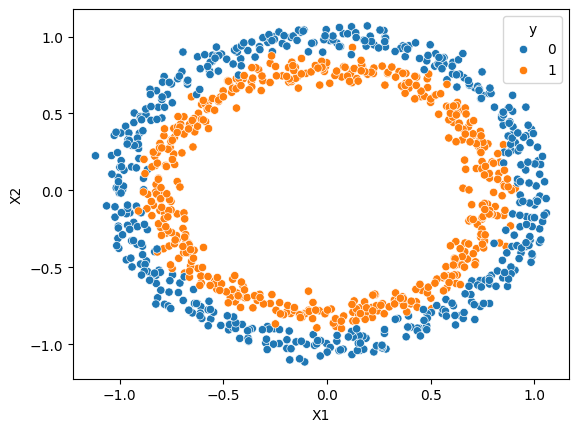

In [7]:
import seaborn as sns
sns.scatterplot(data=df, x="X1", y="X2", hue="y")

## Convert data to torch Tensor

In [8]:
import torch

In [9]:
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

In [10]:
X.shape

torch.Size([1000, 2])

In [11]:
y.shape

torch.Size([1000])

In [12]:
X.dtype

torch.float32

In [13]:
y.dtype

torch.float32

## Train Test split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
xtrain.shape

torch.Size([800, 2])

In [17]:
xtest.shape

torch.Size([200, 2])

# Model training

In [18]:
from torch import nn

In [19]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [20]:
xtrain = xtrain.to(device)
ytrain = ytrain.to(device)
xtest = xtest.to(device)
ytest = ytest.to(device)

In [21]:
xtrain.device, xtest.device, ytrain.device, ytest.device

(device(type='cuda', index=0),
 device(type='cuda', index=0),
 device(type='cuda', index=0),
 device(type='cuda', index=0))

In [22]:
class CircleModelV0(nn.Module):

  def __init__(self) -> None:
    super().__init__()
    # Input layer
    self.layer1 = nn.Linear(in_features=2, out_features=4)
    self.layer2 = nn.Linear(in_features=4, out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.layer2(self.layer1(x))


In [23]:
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer1): Linear(in_features=2, out_features=4, bias=True)
  (layer2): Linear(in_features=4, out_features=1, bias=True)
)

In [24]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [25]:
model_0.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.4102,  0.1137],
                      [-0.6051, -0.2723],
                      [-0.5604,  0.5695],
                      [-0.4595, -0.6196]], device='cuda:0')),
             ('layer1.bias',
              tensor([-0.3862, -0.0444,  0.3432,  0.6515], device='cuda:0')),
             ('layer2.weight',
              tensor([[ 0.2125, -0.4647, -0.3853, -0.3134]], device='cuda:0')),
             ('layer2.bias', tensor([-0.0713], device='cuda:0'))])

In [26]:
torch.manual_seed(42)

model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=4),
    nn.Linear(in_features=4, out_features=1)
).to(device)

In [27]:
model_0

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): Linear(in_features=4, out_features=1, bias=True)
)

In [28]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.6233, -0.5188,  0.6146,  0.1323], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.3694,  0.0677,  0.2411, -0.0706]], device='cuda:0')),
             ('1.bias', tensor([0.3854], device='cuda:0'))])

In [29]:
with torch.inference_mode():
  ypred_test = model_0(xtest)

In [30]:
ypred_test[0:5]

tensor([[0.8349],
        [0.9782],
        [0.5184],
        [0.9360],
        [0.5771]], device='cuda:0')

In [31]:
ytest[0:5]

tensor([1., 0., 1., 0., 1.], device='cuda:0')

### Loss function and optimizer

In [32]:
loss_fn = nn.BCEWithLogitsLoss()
loss_fn

BCEWithLogitsLoss()

In [33]:
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.1
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [34]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

### Train loop

In [35]:
model_0.eval()

with torch.inference_mode():
  y_logits = model_0(xtest)

In [36]:
ypred_probs = torch.sigmoid(y_logits)

In [37]:
ypred_probs[0:5]

tensor([[0.6974],
        [0.7267],
        [0.6268],
        [0.7183],
        [0.6404]], device='cuda:0')

In [38]:
# find predicted labels
ypred_labels = torch.round(ypred_probs)
ypred_labels[0:5]

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], device='cuda:0')

In [39]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

for epoch in range(epochs):
  # Train
  model_0.train()

  # predict
  y_logits = model_0(xtrain).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # Loss function
  loss = loss_fn(y_logits, ytrain)
  acc = accuracy_fn(ytrain, y_pred)

  # Optimizer
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Test loop
  model_0.eval()

  with torch.inference_mode():
    test_logits = model_0(xtest).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, ytest)
    test_acc = accuracy_fn(ytest, test_pred)

  if epoch % 10 == 0:
    print(f"Epoch : {epoch} | Loss : {loss:.4f}, Acc : {acc:.2f}% | Test Loss : {test_loss:.4f}, Test Acc : {test_acc:.2f}%")


Epoch : 0 | Loss : 0.7583, Acc : 50.00% | Test Loss : 0.7648, Test Acc : 50.00%
Epoch : 10 | Loss : 0.7162, Acc : 50.00% | Test Loss : 0.7236, Test Acc : 50.00%
Epoch : 20 | Loss : 0.7017, Acc : 50.00% | Test Loss : 0.7086, Test Acc : 50.00%
Epoch : 30 | Loss : 0.6965, Acc : 55.25% | Test Loss : 0.7028, Test Acc : 51.50%
Epoch : 40 | Loss : 0.6946, Acc : 52.62% | Test Loss : 0.7003, Test Acc : 48.50%
Epoch : 50 | Loss : 0.6939, Acc : 52.00% | Test Loss : 0.6991, Test Acc : 46.00%
Epoch : 60 | Loss : 0.6936, Acc : 52.12% | Test Loss : 0.6984, Test Acc : 47.00%
Epoch : 70 | Loss : 0.6934, Acc : 51.25% | Test Loss : 0.6979, Test Acc : 47.50%
Epoch : 80 | Loss : 0.6933, Acc : 51.75% | Test Loss : 0.6975, Test Acc : 46.00%
Epoch : 90 | Loss : 0.6933, Acc : 51.88% | Test Loss : 0.6972, Test Acc : 46.00%


## Helper functions

In [40]:
import requests
from pathlib import Path

In [41]:
if Path("helper_functions.py").is_file():
  print("File already exists")
else:
  print("Downloading file")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

File already exists


In [42]:
from helper_functions import plot_predictions, plot_decision_boundary

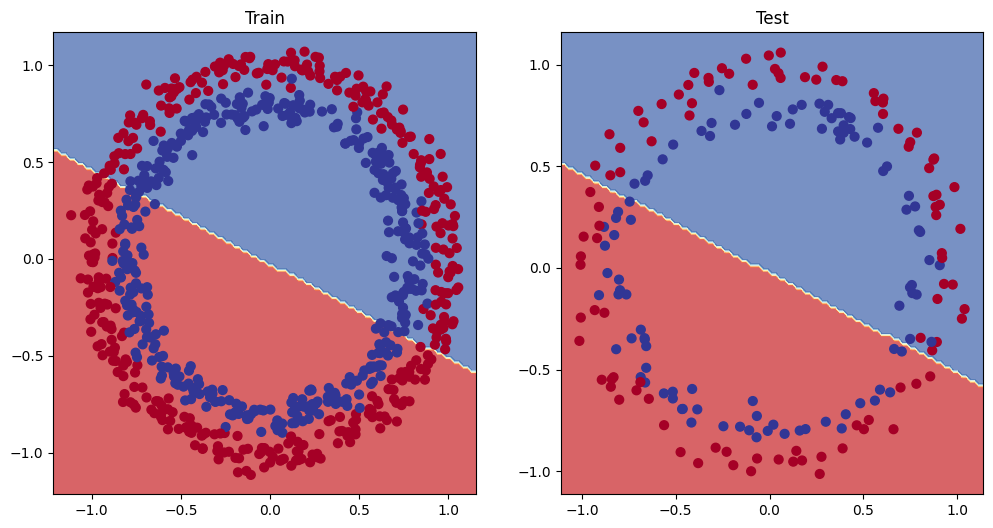

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, xtrain, ytrain)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, xtest, ytest)

In [44]:
class CircleModelV1(nn.Module):

  def __init__(self) -> None:
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=16)
    self.layer_2 = nn.Linear(in_features=16, out_features=8)
    self.layer_3 = nn.Linear(in_features=8, out_features=1)

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    # z = self.layer_1(x)
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x)))

In [45]:
model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=8, bias=True)
  (layer_3): Linear(in_features=8, out_features=1, bias=True)
)

In [46]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params= model_1.parameters(), lr=0.1)

In [47]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

for epoch in range(epochs):
  model_1.train()
  y_logits = model_1(xtrain).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn(y_logits, ytrain)
  acc = accuracy_fn(ytrain, y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(xtest).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, ytest)
    test_acc = accuracy_fn(ytest, test_pred)

  if epoch % 10 == 0:
    print(f"Epoch : {epoch} | Loss : {loss:.4f}, Acc : {acc:.2f}% | Test Loss : {test_loss:.4f}, Test Acc : {test_acc}")

Epoch : 0 | Loss : 0.7003, Acc : 50.00% | Test Loss : 0.6991, Test Acc : 50.0
Epoch : 10 | Loss : 0.6966, Acc : 50.00% | Test Loss : 0.6957, Test Acc : 50.0
Epoch : 20 | Loss : 0.6951, Acc : 51.50% | Test Loss : 0.6943, Test Acc : 52.5
Epoch : 30 | Loss : 0.6943, Acc : 53.87% | Test Loss : 0.6937, Test Acc : 56.00000000000001
Epoch : 40 | Loss : 0.6940, Acc : 51.88% | Test Loss : 0.6935, Test Acc : 55.00000000000001
Epoch : 50 | Loss : 0.6938, Acc : 50.88% | Test Loss : 0.6933, Test Acc : 56.00000000000001
Epoch : 60 | Loss : 0.6936, Acc : 50.50% | Test Loss : 0.6933, Test Acc : 54.0
Epoch : 70 | Loss : 0.6935, Acc : 50.25% | Test Loss : 0.6932, Test Acc : 53.5
Epoch : 80 | Loss : 0.6935, Acc : 49.88% | Test Loss : 0.6932, Test Acc : 54.0
Epoch : 90 | Loss : 0.6934, Acc : 49.62% | Test Loss : 0.6932, Test Acc : 53.5
Epoch : 100 | Loss : 0.6934, Acc : 50.00% | Test Loss : 0.6933, Test Acc : 53.0
Epoch : 110 | Loss : 0.6933, Acc : 50.25% | Test Loss : 0.6933, Test Acc : 53.0
Epoch : 120 

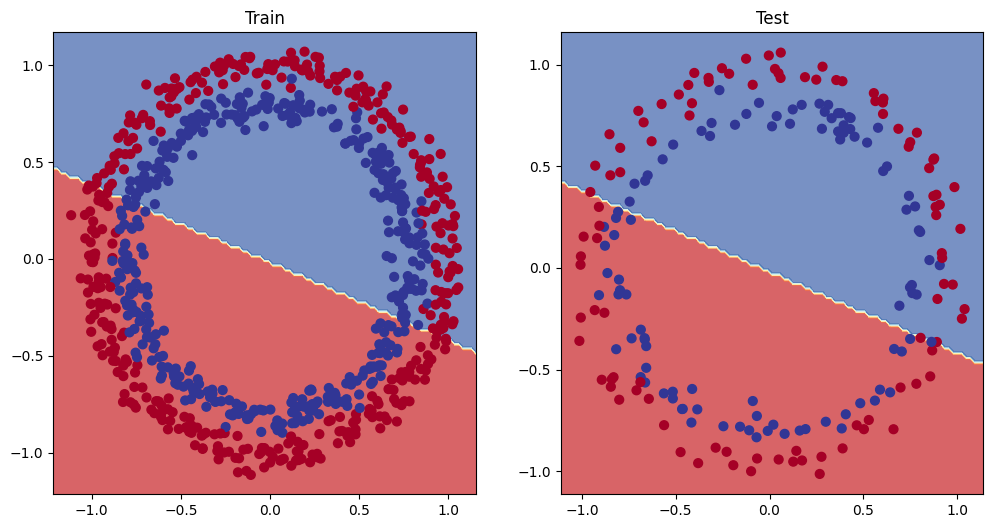

In [48]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, xtrain, ytrain)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, xtest, ytest)

# Non Linear Model

In [49]:
class CircleModelV2(nn.Module):

  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=8)
    self.layer_2 = nn.Linear(in_features=8, out_features=4)
    self.layer_3 = nn.Linear(in_features=4, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

In [50]:
model_2 = CircleModelV2().to(device)

In [51]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

In [52]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs =  2000

for epoch in range(epochs):
  model_2.train()
  y_logits = model_2(xtrain).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn(y_logits, ytrain)
  acc = accuracy_fn(ytrain, y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_2.eval()
  with torch.inference_mode():
    test_logits = model_2(xtest).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, ytest)
    test_acc =accuracy_fn(ytest, test_pred)

  if epoch % 10 == 0:
    print(f"Epoch : {epoch} | Loss : {loss:.4f}, Acc : {acc:.2f}% | Test Loss : {test_loss:.4f}, Test Acc : {test_acc}")

Epoch : 0 | Loss : 0.6937, Acc : 50.00% | Test Loss : 0.6911, Test Acc : 50.0
Epoch : 10 | Loss : 0.6922, Acc : 56.88% | Test Loss : 0.6896, Test Acc : 60.0
Epoch : 20 | Loss : 0.6915, Acc : 55.00% | Test Loss : 0.6888, Test Acc : 54.50000000000001
Epoch : 30 | Loss : 0.6911, Acc : 54.87% | Test Loss : 0.6884, Test Acc : 56.99999999999999
Epoch : 40 | Loss : 0.6908, Acc : 52.50% | Test Loss : 0.6881, Test Acc : 54.0
Epoch : 50 | Loss : 0.6907, Acc : 51.88% | Test Loss : 0.6879, Test Acc : 55.00000000000001
Epoch : 60 | Loss : 0.6905, Acc : 51.00% | Test Loss : 0.6877, Test Acc : 55.00000000000001
Epoch : 70 | Loss : 0.6904, Acc : 50.50% | Test Loss : 0.6875, Test Acc : 55.50000000000001
Epoch : 80 | Loss : 0.6903, Acc : 50.75% | Test Loss : 0.6874, Test Acc : 55.00000000000001
Epoch : 90 | Loss : 0.6902, Acc : 50.38% | Test Loss : 0.6873, Test Acc : 55.00000000000001
Epoch : 100 | Loss : 0.6901, Acc : 50.25% | Test Loss : 0.6871, Test Acc : 55.00000000000001
Epoch : 110 | Loss : 0.6900

In [53]:
model_2.eval()
with torch.inference_mode():
  test_logits = model_2(xtest).squeeze()
  test_pred = torch.round(torch.sigmoid(test_logits))

In [55]:
test_pred[0:5]

tensor([1., 0., 1., 0., 1.], device='cuda:0')

In [56]:
ytest[0:5]

tensor([1., 0., 1., 0., 1.], device='cuda:0')

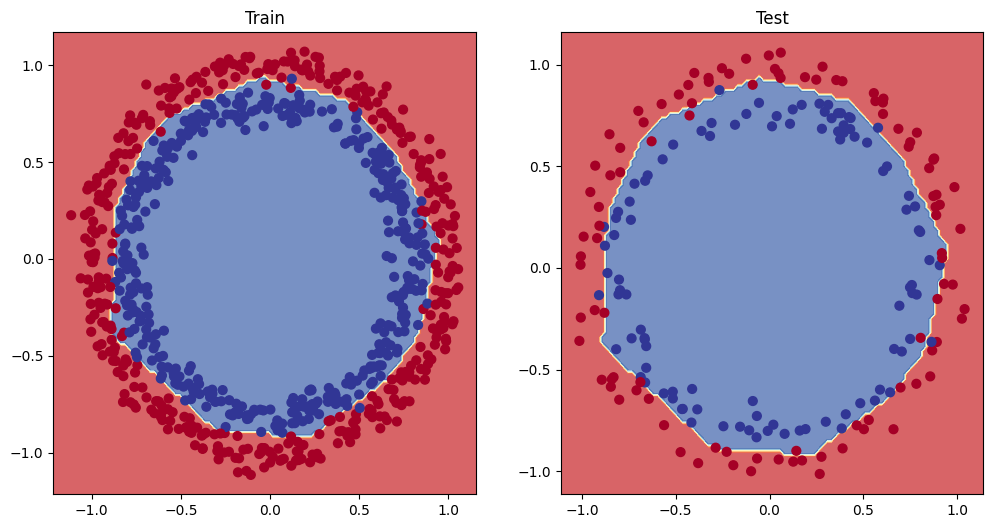

In [54]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_2, xtrain, ytrain)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_2, xtest, ytest)

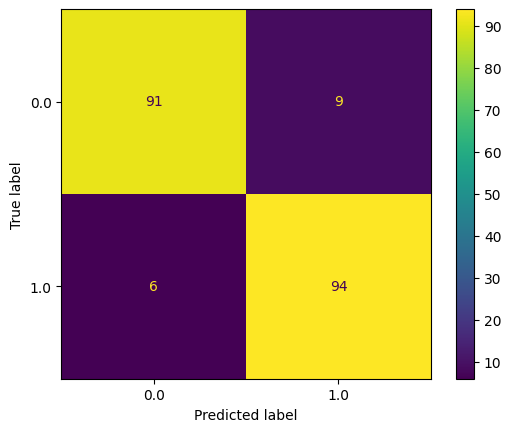

In [58]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(ytest.cpu().detach().numpy(), test_pred.cpu().detach().numpy())